## Setup

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# the data is from https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/code

## Data Wrangling

##### Data collection

In [4]:
movies_df = pd.read_csv('Data/movies_metadata.csv', low_memory=False)

In [5]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### Data cleaning

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
movies_df.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
21151,False,NaN,125687,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,174772,tt2051879,en,Europa Report,A crew of international astronauts are sent on...,...,2013-06-27,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Fear. Sacrifice. Contact.,Europa Report,False,6.2,549.0
4708,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 104...",NaN,86463,tt0082226,en,D.O.A.,Documentary chronicaling the rise and fall of ...,...,1980-09-12,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Rite of Passage,D.O.A.,False,2.4,4.0
10434,False,NaN,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",http://www.dontcomeknocking.com/,3527,tt0377800,en,Don't Come Knocking,Howard Spence has seen better days. Once a big...,...,2005-05-19,0.0,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Don't Come Knocking,False,6.4,23.0
30777,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,81831,tt0056883,it,Il Boom,Sweet-sour comedy on Italy's 1950's rage to ge...,...,1963-09-24,0.0,97.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Boom,False,5.5,4.0
2219,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12888,tt0158493,en,Belly,Tommy Brown and Sincere are best friends as we...,...,1998-11-04,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Money, power, respect... but who's got your back?",Belly,False,6.1,42.0


In [8]:
columns_to_drop = ['belongs_to_collection', 'homepage', 'poster_path', 'video', 'spoken_languages']
movies_df.drop(columns=columns_to_drop, inplace=True)

In [9]:
import ast
# change from str to dict
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

In [10]:
movies_df['production_companies'] = movies_df['production_companies'].fillna('[]')
movies_df['production_companies'] = movies_df['production_companies'].apply(ast.literal_eval)

In [11]:
movies_df['production_countries'] = movies_df['production_countries'].fillna('[]')
movies_df['production_countries'] = movies_df['production_countries'].apply(ast.literal_eval)

In [12]:
def extract_names_from_dicts(dict_list):
    if isinstance(dict_list, list):
        if dict_list: 
            return [obj['name'] for obj in dict_list]
    return []

In [13]:
movies_df['genres'] = movies_df['genres'].apply(extract_names_from_dicts)

In [14]:
movies_df['production_companies'] = movies_df['production_companies'].apply(extract_names_from_dicts)

In [15]:
movies_df['production_countries'] = movies_df['production_countries'].apply(extract_names_from_dicts)

In [16]:
movies_df.sample(5)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
35190,False,0,[],47680,tt0090982,tr,Duvar,"Produced, written and directed by Yılmaz Güney...",0.001586,[],"[France, Turkey]",1983-01-01,0.0,117.0,Released,NaN,The Wall,7.3,6.0
12882,False,0,"[Comedy, Drama, Family, Music]",13649,tt0810900,en,High School Musical 2,The East High Wildcats are ready to have the t...,6.529094,[Disney Channel],[United States of America],2007-08-17,7000000.0,104.0,Released,NaN,High School Musical 2,6.1,884.0
42646,False,0,"[Action, Comedy]",382597,tt5736696,fr,Raid dingue,The story of a woman who dreams to join an int...,7.538272,"[TF1 Films Productions, Pathé, Artémis Product...",[France],2017-02-01,0.0,105.0,Released,NaN,R.A.I.D. Special Unit,5.8,207.0
20852,False,0,"[Documentary, Mystery]",42587,tt0065702,de,Erinnerungen an die Zukunft,Documentary based on the book by Erich Von Dan...,0.005351,[Terra Filmkunst],[Germany],1970-01-01,25.0,92.0,Released,NaN,Chariots of the Gods,7.1,5.0
29525,False,0,"[Animation, Family]",175112,tt2483260,en,Tinker Bell and the Pirate Fairy,"Zarina, a smart and ambitious dust-keeper fair...",12.796484,[DisneyToon Studios],[United States of America],2014-02-13,20300000.0,78.0,Released,NaN,Tinker Bell and the Pirate Fairy,6.5,286.0


In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [18]:
movies_df['popularity'].unique()

array(['21.946943', '17.015539', '11.7129', ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [19]:
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
movies_df['popularity'] = movies_df['popularity'].fillna(0)
movies_df['popularity'] = movies_df['popularity'].astype('float64')

In [20]:
movies_df['budget'].unique()

array(['30000000', '65000000', '0', ..., '3417000', '25868826', '1254040'],
      dtype=object)

In [21]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')

In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45463 non-null  float64
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45466 non-null  float64
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [23]:
movies_df['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [24]:
movies_df['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [25]:
weird_data = movies_df['adult'].isin([' - Written by Ørnås',
                                              ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
                                              ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'])
movies_df.loc[weird_data, 'adult'] = 'False'
movies_df['adult'] = movies_df['adult'].map({'True': 1, 'False': 0})
movies_df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,0,0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,0,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,0,0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0.0,"[Drama, Family]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],[Iran],NaN,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,0,0.0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],[Philippines],2011-11-17,0.0,360.0,Released,NaN,Century of Birthing,9.0,3.0
45463,0,0.0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,0,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[Russia],1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0


In [26]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  int64  
 1   budget                45463 non-null  float64
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45466 non-null  float64
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [27]:
print(movies_df.dtypes)

adult                     int64
budget                  float64
genres                   object
id                       object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
dtype: object


In [28]:
for column in movies_df.columns:
    if movies_df[column].apply(lambda x: isinstance(x, list)).any():
        movies_df[column] = movies_df[column].apply(tuple)

In [29]:
duplicates_for_movies = movies_df[movies_df.duplicated()]
print(duplicates_for_movies)

       adult    budget                                          genres  \
1465       0       0.0                                (Drama, Romance)   
9165       0       0.0                        (Crime, Drama, Thriller)   
9327       0       0.0  (Adventure, Animation, Drama, Action, Foreign)   
13375      0       0.0                             (Thriller, Mystery)   
16764      0       0.0                             (Thriller, Mystery)   
21165      0       0.0               (Fantasy, Drama, Science Fiction)   
21854      0       0.0             (Drama, Science Fiction, Animation)   
22151      0       0.0               (Action, Horror, Science Fiction)   
23044      0       0.0                                        (Drama,)   
24844      0       0.0                                 (Comedy, Drama)   
28860      0       0.0                                 (Drama, Comedy)   
29374      0       0.0                                (Drama, Foreign)   
35798      0       0.0                

In [30]:
movies_df = movies_df.drop_duplicates()
print("DataFrame after removing duplicates:")
movies_df

DataFrame after removing duplicates:


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,"(Animation, Comedy, Family)",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"(Pixar Animation Studios,)","(United States of America,)",1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,"(Adventure, Fantasy, Family)",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"(TriStar Pictures, Teitler Film, Interscope Co...","(United States of America,)",1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,0,0.0,"(Romance, Comedy)",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"(Warner Bros., Lancaster Gate)","(United States of America,)",1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,0,16000000.0,"(Comedy, Drama, Romance)",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"(Twentieth Century Fox Film Corporation,)","(United States of America,)",1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,0,0.0,"(Comedy,)",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"(Sandollar Productions, Touchstone Pictures)","(United States of America,)",1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0.0,"(Drama, Family)",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,(),"(Iran,)",NaN,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,0,0.0,"(Drama,)",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"(Sine Olivia,)","(Philippines,)",2011-11-17,0.0,360.0,Released,NaN,Century of Birthing,9.0,3.0
45463,0,0.0,"(Action, Drama, Thriller)",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"(American World Pictures,)","(United States of America,)",2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,0,0.0,(),227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"(Yermoliev,)","(Russia,)",1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0


In [31]:
movies_df = movies_df.explode('genres')

In [32]:
movies_df = movies_df.explode('production_companies')

In [33]:
movies_df = movies_df.explode('production_countries')

In [34]:
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,Animation,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Family,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


##### Duplicate values

In [35]:
duplicate_rows = movies_df[movies_df.duplicated()]
duplicate_rows

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
7183,0,0.0,Drama,41876,tt0064118,it,La caduta degli dei,"In the early days of Nazi Germany, a powerful ...",2.212979,Eichberg-Film,Germany,1969-10-13,0.0,156.0,Released,He was soon to become the second most powerful...,The Damned,6.8,30.0
7183,0,0.0,Drama,41876,tt0064118,it,La caduta degli dei,"In the early days of Nazi Germany, a powerful ...",2.212979,Eichberg-Film,Italy,1969-10-13,0.0,156.0,Released,He was soon to become the second most powerful...,The Damned,6.8,30.0
25024,0,0.0,Documentary,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Grain Media,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
25024,0,0.0,Documentary,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Violet Films,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
25024,0,0.0,War,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Grain Media,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
25024,0,0.0,War,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Violet Films,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
43297,0,0.0,Thriller,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,Canada,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0
43297,0,0.0,Thriller,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,United States of America,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0
43297,0,0.0,Drama,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,Canada,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0
43297,0,0.0,Drama,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,United States of America,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0


In [36]:
movies_df = movies_df.drop_duplicates()
movies_df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,Animation,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Family,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,0,0.0,Action,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45463,0,0.0,Drama,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45463,0,0.0,Thriller,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,0,0.0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,Russia,1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0


In [37]:
columns_to_edit = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

movies_df[columns_to_edit] = movies_df[columns_to_edit].replace(0, np.nan)

print(movies_df[columns_to_edit].isna().sum())

budget          162110
popularity         113
revenue         175163
runtime           4186
vote_average      7177
vote_count        6812
dtype: int64


##### Missing data

In [38]:
movies_df.isnull().sum()

adult                        0
budget                  162110
genres                    2861
id                           0
imdb_id                     50
original_language           54
original_title               0
overview                  2244
popularity                 113
production_companies     22485
production_countries     10378
release_date               148
revenue                 175163
runtime                   4186
status                     155
tagline                 112320
title                       21
vote_average              7177
vote_count                6812
dtype: int64

In [39]:
movies_df.drop(columns=['id', 'imdb_id', 'overview', 'tagline'], inplace=True)

In [40]:
nan_columns_to_drop = ['production_companies', 'production_countries', 'release_date']
movies_df.dropna(subset=nan_columns_to_drop, inplace=True)

In [41]:
movies_df.isnull().sum()

adult                        0
budget                  139987
genres                     636
original_language           49
original_title               0
popularity                  24
production_companies         0
production_countries         0
release_date                 0
revenue                 152337
runtime                   2293
status                       5
title                        0
vote_average              4712
vote_count                4397
dtype: int64

In [42]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237126 entries, 0 to 45464
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 237126 non-null  int64  
 1   budget                97139 non-null   float64
 2   genres                236490 non-null  object 
 3   original_language     237077 non-null  object 
 4   original_title        237126 non-null  object 
 5   popularity            237102 non-null  float64
 6   production_companies  237126 non-null  object 
 7   production_countries  237126 non-null  object 
 8   release_date          237126 non-null  object 
 9   revenue               84789 non-null   float64
 10  runtime               234833 non-null  float64
 11  status                237121 non-null  object 
 12  title                 237126 non-null  object 
 13  vote_average          232414 non-null  float64
 14  vote_count            232729 non-null  float64
dtypes: flo

##### Where does this go

In [43]:
movies_df.describe()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count
count,237126.000000,9.713900e+04,237102.000000,8.478900e+04,234833.000000,232414.000000,232729.000000
mean,0.000046,3.391602e+07,5.827402,9.206076e+07,105.894717,6.126168,328.414920
std,0.006811,4.261145e+07,9.307147,1.677238e+08,27.850867,1.068311,879.671939
min,0.000000,1.000000e+00,0.000001,1.000000e+00,1.000000,0.500000,1.000000
25%,0.000000,6.000000e+06,1.147328,5.530764e+06,92.000000,5.500000,10.000000
50%,0.000000,1.750000e+07,3.877376,2.761087e+07,102.000000,6.200000,41.000000
75%,0.000000,4.500000e+07,8.489499,1.053163e+08,116.000000,6.900000,214.000000
max,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [44]:
cleaned_data = movies_df.dropna()
cleaned_data

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,0,30000000.0,Animation,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
0,0,30000000.0,Family,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,en,Jumanji,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,en,Jumanji,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,0,12000000.0,Action,ta,சிவாஜி,1.323587,AVM Productions,India,2007-06-14,19000000.0,185.0,Released,Sivaji: The Boss,6.9,25.0
45250,0,12000000.0,Comedy,ta,சிவாஜி,1.323587,AVM Productions,India,2007-06-14,19000000.0,185.0,Released,Sivaji: The Boss,6.9,25.0
45250,0,12000000.0,Drama,ta,சிவாஜி,1.323587,AVM Productions,India,2007-06-14,19000000.0,185.0,Released,Sivaji: The Boss,6.9,25.0
45412,0,2000000.0,Romance,en,Про любоff,0.121844,Profit,Russia,2010-09-30,1268793.0,107.0,Released,Pro Lyuboff,4.0,3.0


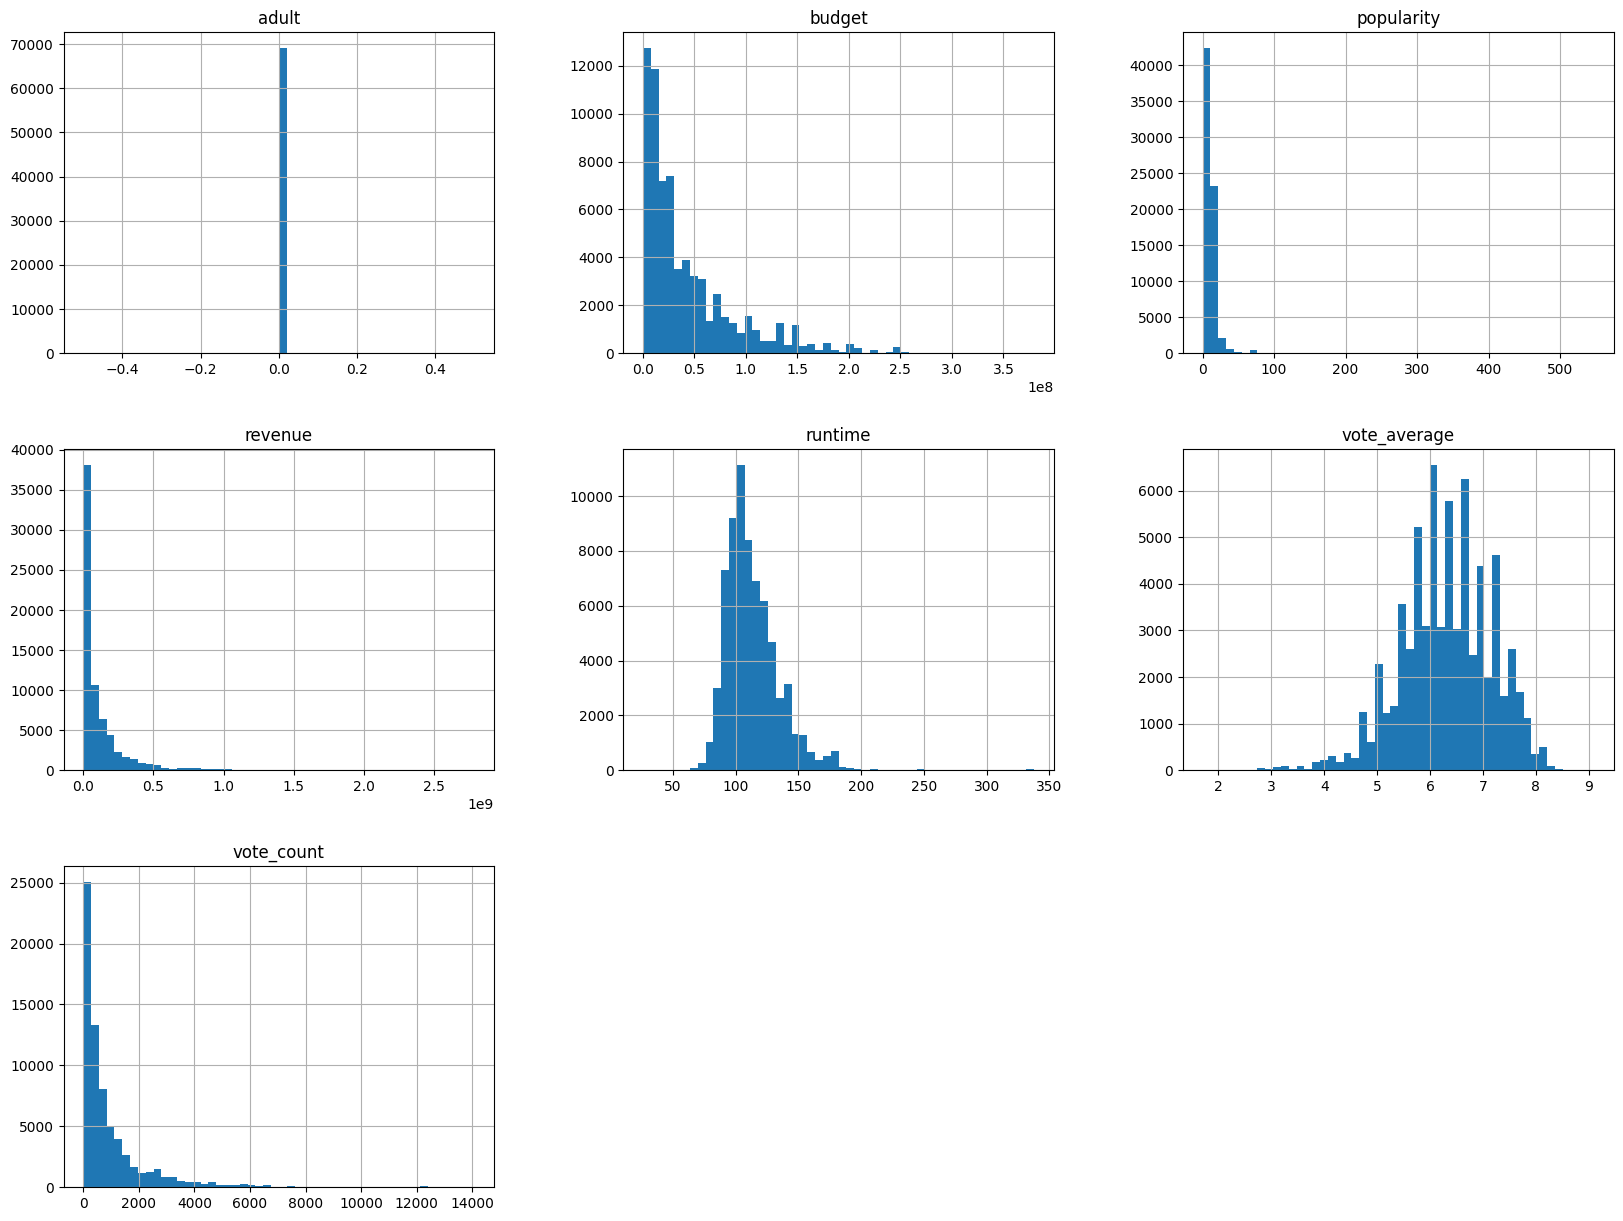

In [45]:
cleaned_data.hist(bins=50, figsize=(20,15))
plt.show()

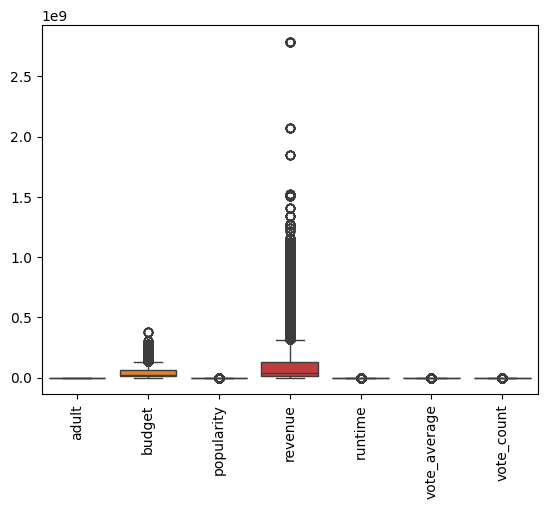

In [46]:
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.show()

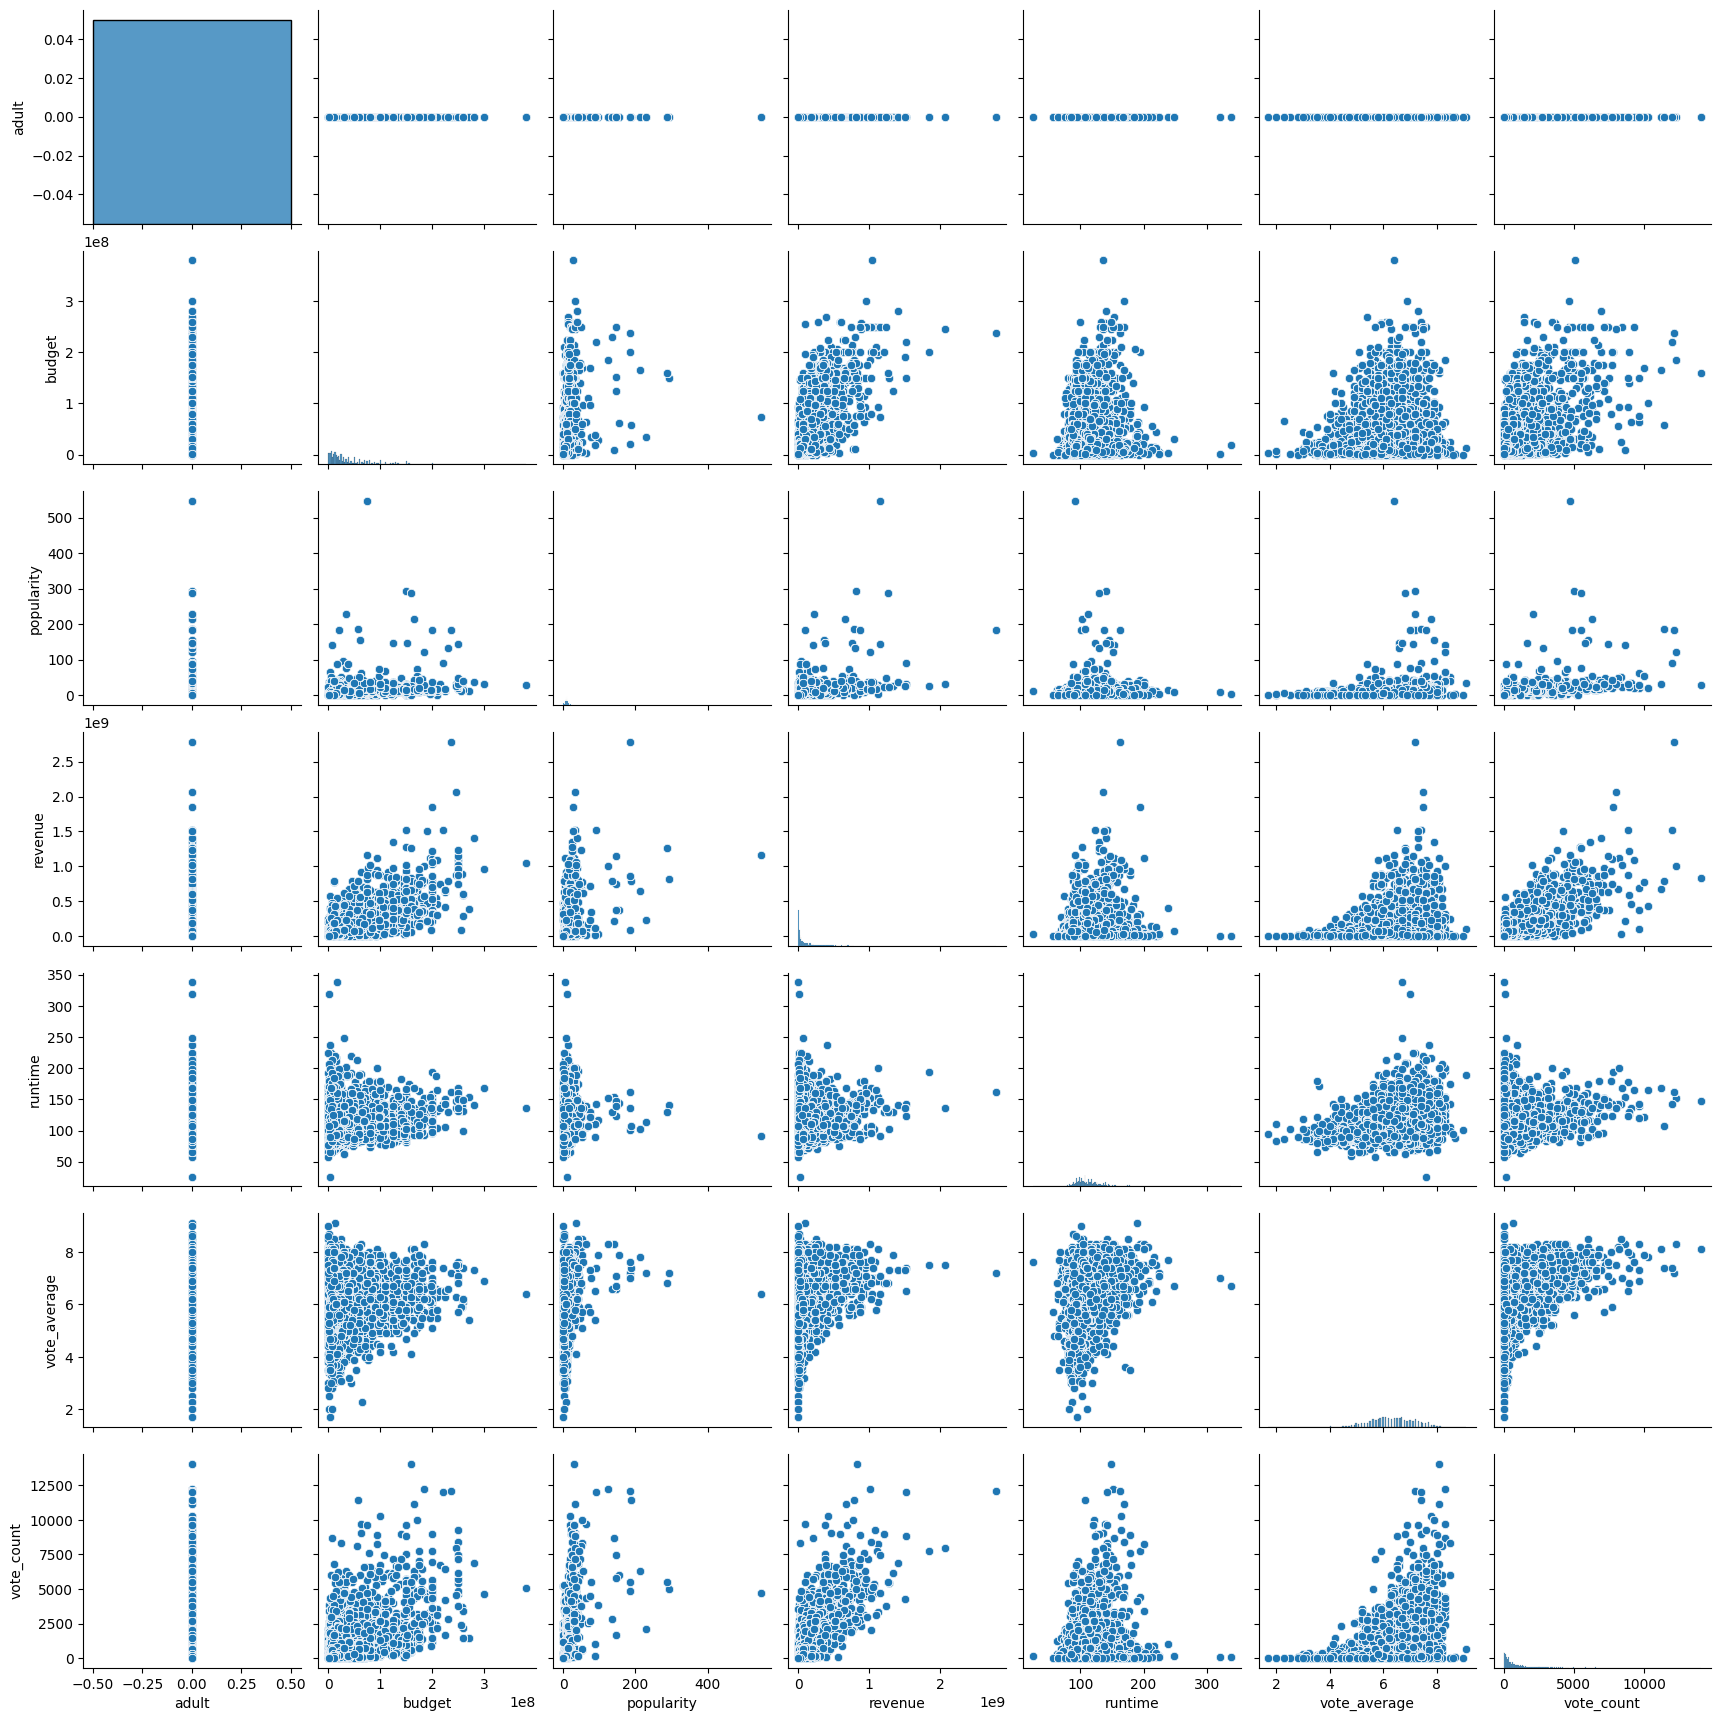

In [47]:
sns.pairplot(cleaned_data)
#sns.pairplot(cleaned_data, hue = 'genres')
plt.show()

In [48]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(cleaned_data, 0.2)
print('Length of training set: ' + str(len(train_set)))
print('Length of test set: ' + str(len(test_set)))

Length of training set: 55373
Length of test set: 13843


In [49]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cleaned_data, test_size=0.2, random_state=42)

<Axes: >

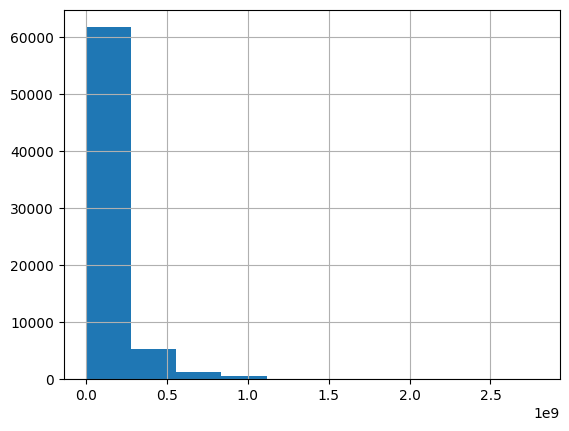

In [50]:
cleaned_data["revenue"].hist()

In [51]:
cleaned_data["income_cat"] = pd.cut(cleaned_data["revenue"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

cleaned_data["income_cat"].value_counts()

/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_44450/2839819599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["income_cat"] = pd.cut(cleaned_data["revenue"],


income_cat
5    69115
1       36
3       32
4       29
2        4
Name: count, dtype: int64

<Axes: >

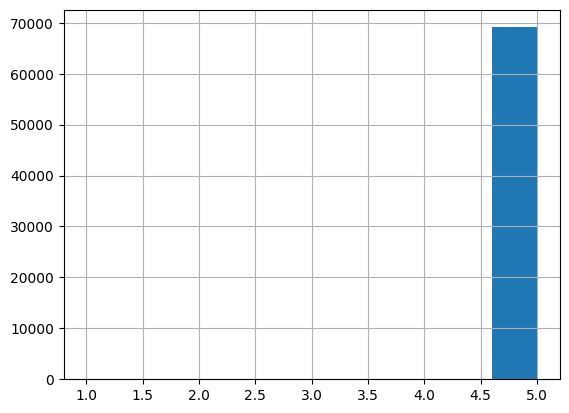

In [52]:
cleaned_data["income_cat"].hist()

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cleaned_data, cleaned_data["income_cat"]):
    strat_train_set = cleaned_data.iloc[train_index]
    strat_test_set = cleaned_data.iloc[test_index]

In [54]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
5    0.998555
1    0.000506
3    0.000433
4    0.000433
2    0.000072
Name: count, dtype: float64

In [55]:
cleaned_data["income_cat"].value_counts() / len(cleaned_data)

income_cat
5    0.998541
1    0.000520
3    0.000462
4    0.000419
2    0.000058
Name: count, dtype: float64

In [56]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(cleaned_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(cleaned_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100

In [57]:
compare_props

,Overall,Stratified,Random,Strat. %error,Rand. %error
income_cat,,,,,
1,0.000520,0.000506,0.000433,-2.783396,-16.671482
2,0.000058,0.000072,0.000217,24.992777,274.978330
3,0.000462,0.000433,0.000650,-6.255418,40.616874
4,0.000419,0.000433,0.000722,3.442298,72.403830
5,0.998541,0.998555,0.997977,0.001455,-0.056416


In [58]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_44450/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_44450/1299016719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [59]:
cleaned_data = strat_train_set.copy()

<Axes: xlabel='budget', ylabel='revenue'>

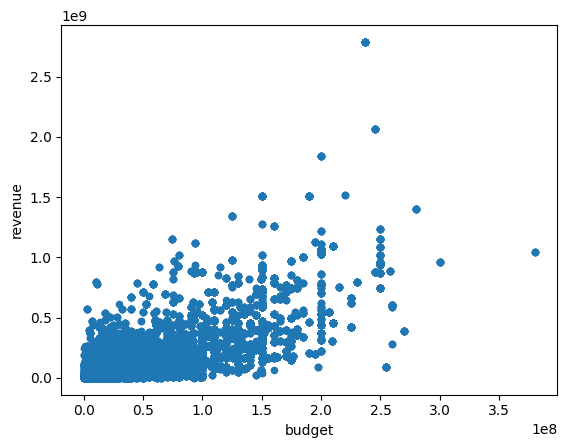

In [60]:
cleaned_data.plot(kind="scatter", x="budget", y="revenue")

<Axes: xlabel='budget', ylabel='revenue'>

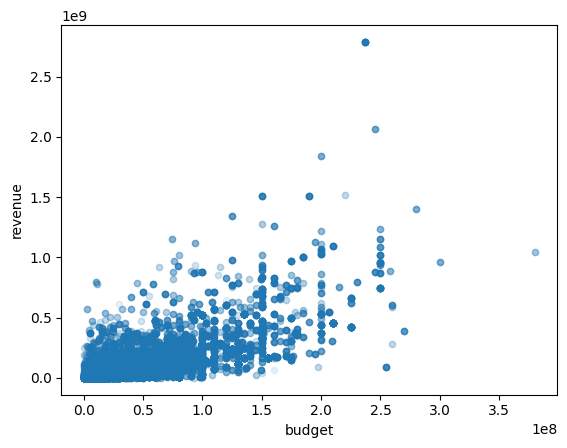

In [61]:
cleaned_data.plot(kind="scatter", x="budget", y="revenue", alpha=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


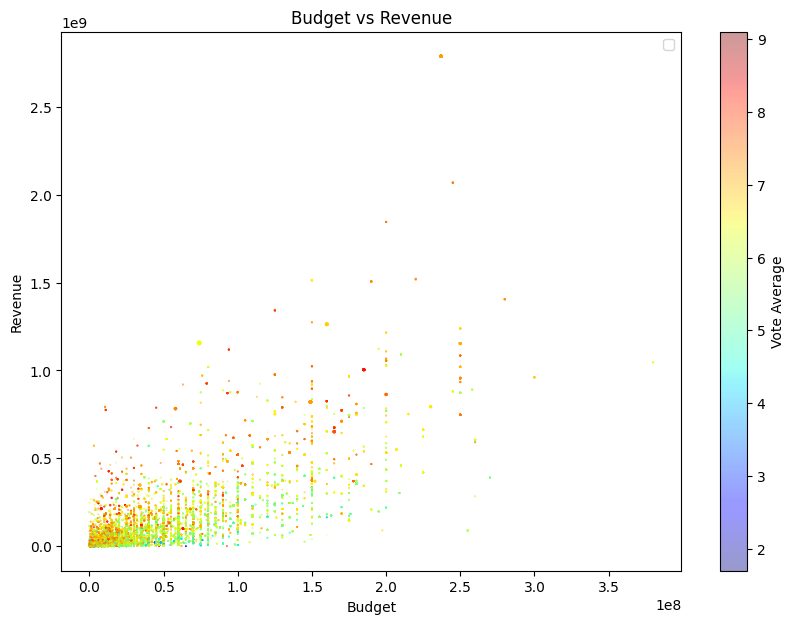

In [62]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    cleaned_data['budget'],
    cleaned_data['revenue'],
    alpha=0.4,
    s=cleaned_data['popularity'] / 100,
    c=cleaned_data['vote_average'],
    cmap=plt.get_cmap('jet')
)

plt.colorbar(scatter, label='Vote Average')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [63]:
corr_matrix = cleaned_data.corr(numeric_only = True)
corr_matrix["vote_average"].sort_values(ascending=False)

vote_average    1.000000
runtime         0.399382
vote_count      0.322419
revenue         0.163240
popularity      0.143514
budget         -0.073684
adult                NaN
Name: vote_average, dtype: float64

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there's a strong positive correlation, and when it is close to -1, it means that there's a strong negative correlation. When it is close to 0 that means that there is no linear correlation.

However, there could still be a nonlinear relationship.

array([[<Axes: xlabel='vote_average', ylabel='vote_average'>,
        <Axes: xlabel='runtime', ylabel='vote_average'>,
        <Axes: xlabel='vote_count', ylabel='vote_average'>,
        <Axes: xlabel='revenue', ylabel='vote_average'>,
        <Axes: xlabel='popularity', ylabel='vote_average'>],
       [<Axes: xlabel='vote_average', ylabel='runtime'>,
        <Axes: xlabel='runtime', ylabel='runtime'>,
        <Axes: xlabel='vote_count', ylabel='runtime'>,
        <Axes: xlabel='revenue', ylabel='runtime'>,
        <Axes: xlabel='popularity', ylabel='runtime'>],
       [<Axes: xlabel='vote_average', ylabel='vote_count'>,
        <Axes: xlabel='runtime', ylabel='vote_count'>,
        <Axes: xlabel='vote_count', ylabel='vote_count'>,
        <Axes: xlabel='revenue', ylabel='vote_count'>,
        <Axes: xlabel='popularity', ylabel='vote_count'>],
       [<Axes: xlabel='vote_average', ylabel='revenue'>,
        <Axes: xlabel='runtime', ylabel='revenue'>,
        <Axes: xlabel='vote_count',

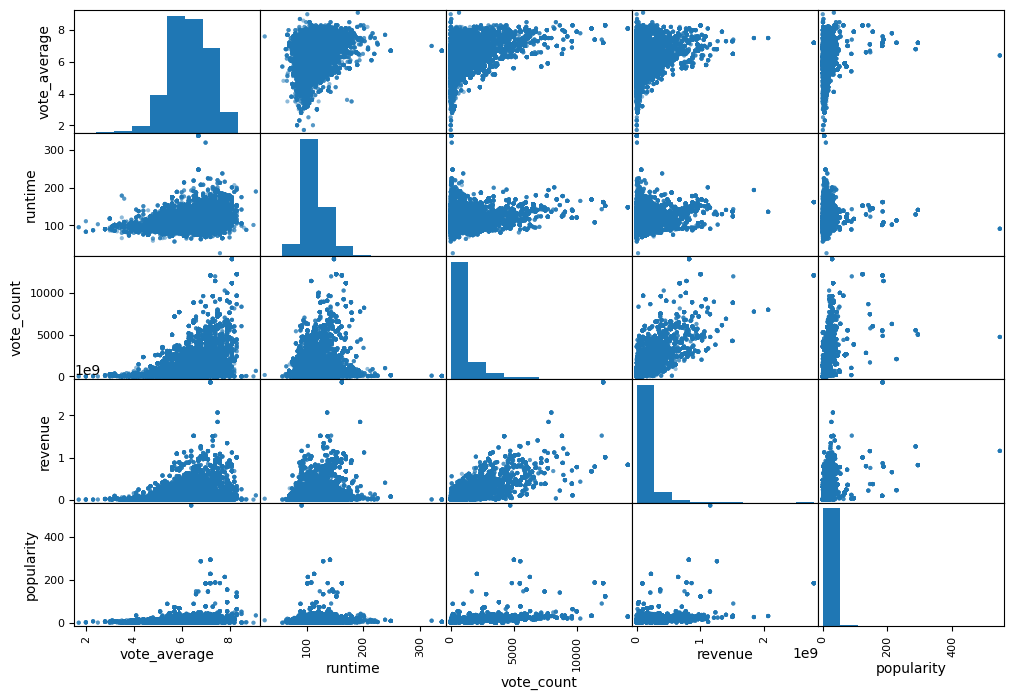

In [64]:
from pandas.plotting import scatter_matrix

attributes = ["vote_average", "runtime", "vote_count",
              "revenue", "popularity"]
scatter_matrix(cleaned_data[attributes], figsize=(12, 8))

(0.0, 12.0, 0.0, 600000000.0)

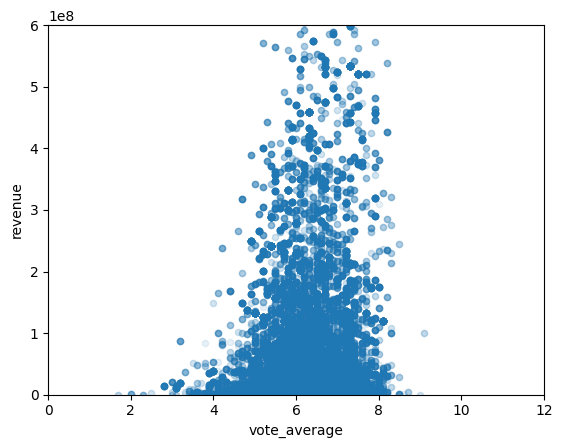

In [65]:
cleaned_data.plot(kind="scatter", x="vote_average", y="revenue",
             alpha=0.1)
plt.axis([0, 12, 0, 600000000])

In [66]:
cleaned_data["budget_per_popularity"] = cleaned_data["budget"] / cleaned_data["popularity"]
cleaned_data["revenue_per_budget"] = cleaned_data["revenue"] / cleaned_data["budget"]
cleaned_data["vote_count_per_revenue"] = cleaned_data["vote_count"] / cleaned_data["revenue"]

# Calculate the correlation matrix
corr_matrix = cleaned_data.corr(numeric_only=True)
corr_matrix["revenue"].sort_values(ascending=False)

revenue                   1.000000
vote_count                0.775077
budget                    0.719904
popularity                0.447069
runtime                   0.218048
budget_per_popularity     0.199967
vote_average              0.163240
revenue_per_budget       -0.007122
vote_count_per_revenue   -0.029894
adult                          NaN
Name: revenue, dtype: float64

## Ændre i x og y axis for at få data til at passe

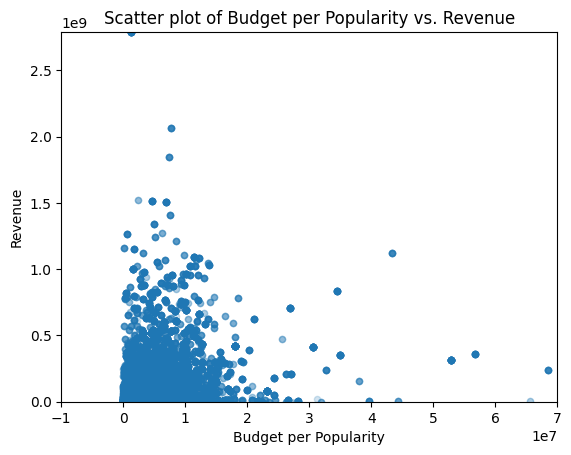

In [67]:
cleaned_data.plot(kind="scatter", x="budget_per_popularity", y="revenue", alpha=0.2)
plt.axis([-10000000,70000000,0, cleaned_data["revenue"].max()])  # Adjust the axis limits as needed
plt.xlabel("Budget per Popularity")
plt.ylabel("Revenue")
plt.title("Scatter plot of Budget per Popularity vs. Revenue")
plt.show()

In [68]:
cleaned_data

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,budget_per_popularity,revenue_per_budget,vote_count_per_revenue
19486,0,8000000.0,History,da,En kongelig affære,8.168448,Sirena Film,Czech Republic,2012-03-29,7594693.0,137.0,Released,A Royal Affair,7.2,244.0,9.793782e+05,0.949337,0.000032
10368,0,60000000.0,Action,en,Doom,11.953553,Distant Planet Productions,United Kingdom,2005-10-20,55987321.0,105.0,Released,Doom,5.0,619.0,5.019428e+06,0.933122,0.000011
4097,0,50000000.0,Crime,en,Exit Wounds,12.280827,NPV Entertainment,Canada,2001-03-13,79958599.0,101.0,Released,Exit Wounds,5.3,111.0,4.071387e+06,1.599172,0.000001
20383,0,60000000.0,Romance,en,Upside Down,7.375350,Onyx Films,France,2012-09-27,8106475.0,104.0,Released,Upside Down,6.2,1094.0,8.135207e+06,0.135108,0.000135
29916,0,4000000.0,Drama,en,The Lobster,11.223033,L'Aide aux Cinémas du Monde,Ireland,2015-10-08,15656193.0,118.0,Released,The Lobster,6.7,1340.0,3.564099e+05,3.914048,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17651,0,25000000.0,Fantasy,en,Don't Be Afraid of the Dark,8.678170,FilmDistrict,Mexico,2010-11-06,36993168.0,99.0,Released,Don't Be Afraid of the Dark,5.4,347.0,2.880792e+06,1.479727,0.000009
15005,0,33000000.0,Comedy,fr,Micmacs à tire-larigot,5.278672,Région Ile-de-France,France,2009-10-28,14000000.0,100.0,Released,Micmacs,6.8,150.0,6.251572e+06,0.424242,0.000011
4215,0,80000000.0,Science Fiction,en,Evolution,5.395127,DreamWorks SKG,United States of America,2001-06-08,98376292.0,101.0,Released,Evolution,5.7,650.0,1.482820e+07,1.229704,0.000007
6785,0,32000000.0,Comedy,en,Elf,8.754132,New Line Cinema,Germany,2003-10-09,173398518.0,97.0,Released,Elf,6.4,1007.0,3.655417e+06,5.418704,0.000006


In [69]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

rm_genre_df = cleaned_data.drop(["genres", "original_title","original_language", "production_companies",
                                 "production_countries", "status", "title", "release_date"], axis=1)

adult 
budget	
genres	
original_language	
original_title	
popularity	
production_companies 
production_countries 
release_date	
revenue	
runtime	
status	
title	
vote_average	
vote_count

In [70]:
imputer.fit(rm_genre_df)

SimpleImputer(strategy='median')

In [71]:
imputer.statistics_

array([0.00000000e+00, 2.50000000e+07, 9.74672500e+00, 4.04239450e+07,
       1.09000000e+02, 6.30000000e+00, 4.51000000e+02, 2.82238680e+06,
       1.79797390e+00, 9.94815624e-06])

In [72]:
rm_genre_df.median().values

array([0.00000000e+00, 2.50000000e+07, 9.74672500e+00, 4.04239450e+07,
       1.09000000e+02, 6.30000000e+00, 4.51000000e+02, 2.82238680e+06,
       1.79797390e+00, 9.94815624e-06])

In [73]:
X = imputer.transform(rm_genre_df)

movie_tr = pd.DataFrame(X, columns=rm_genre_df.columns,
                          index=rm_genre_df.index)

movie_tr.head()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,budget_per_popularity,revenue_per_budget,vote_count_per_revenue
19486,0.0,8000000.0,8.168448,7594693.0,137.0,7.2,244.0,9.793782e+05,0.949337,0.000032
10368,0.0,60000000.0,11.953553,55987321.0,105.0,5.0,619.0,5.019428e+06,0.933122,0.000011
4097,0.0,50000000.0,12.280827,79958599.0,101.0,5.3,111.0,4.071387e+06,1.599172,0.000001
20383,0.0,60000000.0,7.375350,8106475.0,104.0,6.2,1094.0,8.135207e+06,0.135108,0.000135
29916,0.0,4000000.0,11.223033,15656193.0,118.0,6.7,1340.0,3.564099e+05,3.914048,0.000086


In [74]:
movie_cat = cleaned_data[["genres", "title"]]
movie_cat.head(10)

,genres,title
19486,History,A Royal Affair
10368,Action,Doom
4097,Crime,Exit Wounds
20383,Romance,Upside Down
29916,Drama,The Lobster
24991,Family,Dolphin Tale 2
10335,Drama,Proof
10012,Adventure,Kingdom of Heaven
7168,Thriller,Twisted
13056,Mystery,Blindness


In [75]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
movie_cat_encoded = ordinal_encoder.fit_transform(movie_cat)
movie_cat_encoded[:10]

array([[1.000e+01, 1.460e+02],
       [0.000e+00, 1.131e+03],
       [4.000e+00, 1.288e+03],
       [1.400e+01, 4.746e+03],
       [6.000e+00, 4.137e+03],
       [7.000e+00, 1.119e+03],
       [6.000e+00, 2.879e+03],
       [1.000e+00, 2.051e+03],
       [1.700e+01, 4.698e+03],
       [1.300e+01, 5.980e+02]])

ordinal_encoder.categories_

In [76]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
# or alternatively:
# cat_encoder = OneHotEncoder(sparse=False) # to not return a sparse matrix
movie_cat_1hot = cat_encoder.fit_transform(movie_cat)
movie_cat_1hot

<55372x5037 sparse matrix of type '<class 'numpy.float64'>'
	with 110744 stored elements in Compressed Sparse Row format>

In [77]:
movie_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
cat_encoder.categories_

[array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
        'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
        'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
        'TV Movie', 'Thriller', 'War', 'Western'], dtype=object),
 array(['(500) Days of Summer', '10 Cloverfield Lane',
        '10 Things I Hate About You', ..., 'xXx: Return of Xander Cage',
        'xXx: State of the Union', 'Æon Flux'], dtype=object)]

### Custom Transformer

In [79]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# column names and indices
col_names = ["budget", "revenue", "popularity", "vote_count"]
budget_ix, revenue_ix, popularity_ix, vote_count_ix = [
    cleaned_data.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_revenue_per_budget=True):  # no *args or **kwargs
        self.add_revenue_per_budget = add_revenue_per_budget

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        budget_per_vote = X[:, budget_ix] / X[:, vote_count_ix]
        popularity_per_vote = X[:, popularity_ix] / X[:, vote_count_ix]
        if self.add_revenue_per_budget:
            revenue_per_budget = X[:, revenue_ix] / X[:, budget_ix]
            return np.c_[X, budget_per_vote, popularity_per_vote, revenue_per_budget]
        else:
            return np.c_[X, budget_per_vote, popularity_per_vote]

attr_adder = CombinedAttributesAdder(add_revenue_per_budget=True)
# returns numpy array
cleaned_data_extra_attribs = attr_adder.transform(cleaned_data.values)


In [80]:
new_columns = cleaned_data.columns.tolist() + ["budget_per_vote", "popularity_per_vote"]
if attr_adder.add_revenue_per_budget:
    new_columns.append("revenue_per_budget")

cleaned_data_extra_attribs_df = pd.DataFrame(cleaned_data_extra_attribs, columns=new_columns)

cleaned_data_extra_attribs_df.head()

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,status,title,vote_average,vote_count,budget_per_popularity,revenue_per_budget,vote_count_per_revenue,budget_per_vote,popularity_per_vote,revenue_per_budget
0,0,8000000.0,History,da,En kongelig affære,8.168448,Sirena Film,Czech Republic,2012-03-29,7594693.0,...,Released,A Royal Affair,7.2,244.0,979378.212361,0.949337,0.000032,32786.885246,0.033477,0.949337
1,0,60000000.0,Action,en,Doom,11.953553,Distant Planet Productions,United Kingdom,2005-10-20,55987321.0,...,Released,Doom,5.0,619.0,5019428.114804,0.933122,0.000011,96930.533118,0.019311,0.933122
2,0,50000000.0,Crime,en,Exit Wounds,12.280827,NPV Entertainment,Canada,2001-03-13,79958599.0,...,Released,Exit Wounds,5.3,111.0,4071387.049097,1.599172,0.000001,450450.45045,0.110638,1.599172
3,0,60000000.0,Romance,en,Upside Down,7.37535,Onyx Films,France,2012-09-27,8106475.0,...,Released,Upside Down,6.2,1094.0,8135207.142712,0.135108,0.000135,54844.606947,0.006742,0.135108
4,0,4000000.0,Drama,en,The Lobster,11.223033,L'Aide aux Cinémas du Monde,Ireland,2015-10-08,15656193.0,...,Released,The Lobster,6.7,1340.0,356409.893832,3.914048,0.000086,2985.074627,0.008375,3.914048


### Transformation pipelines

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

movie_tr = num_pipeline.fit_transform(rm_genre_df)
movie_tr

array([[ 0.        , -0.75417842, -0.23429367, ..., -0.29593086,
        -0.01487443, -0.04937159],
       [ 0.        ,  0.36139771,  0.01790889, ...,  0.00421889,
        -0.01487454, -0.04939543],
       [ 0.        ,  0.14686384,  0.03971524, ..., -0.06621447,
        -0.01487007, -0.04940636],
       ...,
       [ 0.        ,  0.79046545, -0.41908078, ...,  0.7329473 ,
        -0.01487255, -0.04940046],
       [ 0.        , -0.23929713, -0.19526939, ..., -0.0971184 ,
        -0.01484443, -0.04940136],
       [ 0.        , -0.49673777,  0.32927892, ..., -0.27932554,
        -0.0148351 , -0.04940163]])

### Linear Regression Model

In [ ]:
X = movie_tr
y = cleaned_data['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [114]:
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [ 0.00000000e+00  2.34257058e-14  2.84961298e-08  1.00000000e+00
  8.24457869e-10 -7.04440379e-09 -9.05261076e-13 -9.87365701e-17
  4.74224433e-15 -2.55500045e-09]
Intercept: -4.023313522338867e-07


In [115]:
from sklearn.metrics import mean_squared_error

movie_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, movie_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.0654143647142229e-06

In [116]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, movie_predictions)
lin_mae

5.988161946089488e-07

### Decision Tree model

In [117]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [118]:
movie_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, movie_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [119]:
movie_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, movie_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

lin_mae = mean_absolute_error(y_train, movie_predictions)
lin_mae

0.0

### Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [243869.57244815  32138.08168495  93598.40485553 112843.64447345
  77270.5319589   26380.99560771 192159.37478301  89514.21334409
 282220.35243574  50031.6826348 ]
Mean: 120002.68542263375
Standard deviation: 84704.98061262032


### Random Forrest Regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

# Perform cross-validation
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

# Display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [ 73166.03189039 196586.3248622   72917.04251927 844669.97517803
 424991.95170826 336956.74813607 166312.13250987 177250.00396857
 734257.09834044 329659.21749041]
Mean: 335676.65266035096
Standard deviation: 252396.42362514386


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
forest_reg = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters from Grid Search: ", best_params)

# Use the best estimator for prediction
best_forest_reg = grid_search.best_estimator_
forest_scores = cross_val_score(best_forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

# Display scores
display_scores(forest_rmse_scores)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


In [108]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003569,0.000871,0.0,0.0,True,None,auto,1,2,50,"{'bootstrap': True, 'max_depth': None, 'max_fe...",NaN,NaN,NaN,NaN,NaN,433
1,0.003782,0.000197,0.0,0.0,True,None,auto,1,2,100,"{'bootstrap': True, 'max_depth': None, 'max_fe...",NaN,NaN,NaN,NaN,NaN,433
2,0.002829,0.000040,0.0,0.0,True,None,auto,1,2,200,"{'bootstrap': True, 'max_depth': None, 'max_fe...",NaN,NaN,NaN,NaN,NaN,433
3,0.003329,0.000524,0.0,0.0,True,None,auto,1,5,50,"{'bootstrap': True, 'max_depth': None, 'max_fe...",NaN,NaN,NaN,NaN,NaN,433
4,0.004283,0.001005,0.0,0.0,True,None,auto,1,5,100,"{'bootstrap': True, 'max_depth': None, 'max_fe...",NaN,NaN,NaN,NaN,NaN,433


In [92]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters found: ", best_params)

Best Parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [101]:
movie_predictions = best_model.predict(X_val)

mse = mean_squared_error(y_val, movie_predictions)
mae = mean_absolute_error(y_val, movie_predictions)
r2 = r2_score(y_val, movie_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5306436326.778469
Mean Absolute Error: 3703.9619716944826
R^2 Score: 0.9999998393813593


In [102]:
new_predictions = best_model.predict(X_test)

print("Predictions on the data: ", new_predictions)

Predictions on the data:  [7.59469300e+06 5.59873210e+07 7.99585990e+07 ... 9.83762920e+07
 1.73398518e+08 1.36150434e+08]


In [ ]:
## 
mse = mean_squared_error(y_test, new_predictions)
mae = mean_absolute_error(y_test, new_predictions)
r2 = r2_score(y_test, new_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

In [90]:
fail

NameError: name 'fail' is not defined

In [ ]:
X = cleaned_data[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
y = cleaned_data['revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SGD Regressor

In [ ]:
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

In [ ]:
print("SGD Regressor Metrics:")
m_s_e = mean_squared_error(y_test, sgd_predictions)
print("MSE:", m_s_e)
m_a_e = mean_absolute_error(y_test, sgd_predictions)
print("MAE:", m_a_e)
r2 = r2_score(y_test, sgd_predictions)
print("R-squared:", r2)


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state = 42)

# Fit the model
sgd_classifier.fit(X_train, y_train)

Making predictions

In [ ]:
y_pred = sgd_classifier.predict(X_test)

Calculate the Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

class_report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nF1 Score:")
print(f1)
print("\nRecall:")
print(recall)

In [ ]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
num_attribs = ['adult', 'budget', 'runtime', 'popularity', 'vote_average', 'vote_count']
cat_attribs = ['genres', 'production_companies', 'production_countries']

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), 
        ("cat", categorical_transformer, cat_attribs), 
    ])

In [ ]:
X = movies_df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'genres']]
y = movies_df['revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
columns_to_encode = ['genres']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), columns_to_encode),
    ],
    remainder='passthrough')

In [ ]:
non_numeric_values = X_train['genres'].apply(lambda x: isinstance(x, str) and not x.isnumeric())

print(non_numeric_values)

In [ ]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_encoded) 

X_test_imputed = imputer.transform(X_test_encoded)

In [ ]:
missing_values = y_train.isnull().sum()
print("Number of missing values in y_train:", missing_values)

In [ ]:
print(X_train.columns)

In [ ]:
y_train = y_train.dropna()
y_test = y_test.dropna()

In [ ]:
X_train_prepared= full_pipeline.fit_transform(X_train)

In [ ]:
X_train_prepared= full_pipeline.fit_transform(X_train)

In [ ]:
print("Shape of X_train_prepared:", X_train_prepared.shape)

In [ ]:
print("Data type of X_train_prepared:", type(X_train_prepared))

In [ ]:
print("First few rows of X_train_prepared:")
X_train_prepared[:5]

In [ ]:
print("Data contains sequences or irregularities:", any(isinstance(row, list) for row in X_train_prepared))

In [ ]:
valid_indices = ~np.isnan(y_train)

# Filter X_train_prepared and y_train
X_train_valid = X_train_prepared[valid_indices]
y_train_valid = y_train[valid_indices]

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_valid, y_train_valid)

In [ ]:
X_val_prepared = full_pipeline.transform(X_val)

In [ ]:
print("Predictions: ", lin_reg.predict(X_val_prepared))